In [1]:
from graphics import * 
import pandas as pd 
import numpy as np 
from new_data_loader import bench, squat, deadlift
from data_loader import be, sq, de
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

interval = 100
t = squat[0]['gravityX'].dropna().to_numpy()
bench.extend(be)
squat.extend(sq)
deadlift.extend(de)

bench = [e for e in bench if len(e['gravityX'].dropna().to_numpy()) > interval]
squat = [e for e in squat if len(e['gravityX'].dropna().to_numpy()) > interval]
deadlift = [e for e in deadlift if len(e['gravityX'].dropna().to_numpy()) > interval]

['novel', 'bench', '20', '5', 'bad-2024-10-25', '23-24-47.json']
['brian', 'bench', '35', '5', '-2024-10-25', '23-19-10.json']
['novel', 'squat', '20', '5', '-2024-10-25', '00-49-17.json']
['neal', 'bench', '0', '5', '-2024-10-25', '23-34-22.json']
['novel', 'squat', '20', '5', '-2024-10-25', '00-50-36.json']
['neal', 'deadlift', '25', '5', '-2024-10-25', '23-50-52.json']
['novel', 'deadlift', '35', '5', '-2024-10-25', '00-11-12.json']
['brian', 'deadlift', '60', '5', '-2024-10-25', '23-48-04.json']
['novel', 'deadlift', '35', '5', '-2024-10-25', '00-12-44.json']
['brian', 'bench', '45', '5', '-2024-10-25', '23-39-37.json']
['brian', 'squat', '35', '5', '-2024-10-25', '00-22-02.json']
['novel', 'deadlift', '25', '5', '-2024-10-25', '00-09-36.json']
['novel', 'deadlift', '40', '5', '-2024-10-25', '00-14-48.json']
['brian', 'deadlift', '35', '5', '-2024-10-25', '23-43-11.json']
['neal', 'bench', '10', '5', '-2024-10-25', '23-34-56.json']
['neal', 'squat', '15', '4', '-2024-10-25', '00-39

In [13]:
def process_signal(sig, interval, normalize=False):
    if normalize: 
        mean = np.mean(sig)
        std = np.std(sig)
        sig = (sig - mean)/std
        #pos = np.where(sig > 0, 1, 0)
        #zeros = pos[1:] - pos[:-1]
        #zeros = np.where(sig != 0)
        #zeros = np.average(np.diff(zeros))
        #interval = int(zeros)
    if interval not in sig.shape:
        sig = sig.reshape(-1, 1)
    pad_len = interval - (sig.shape[0] % interval)
    if pad_len != interval:
        padding = np.zeros((pad_len, sig.shape[1]))
        padding[:, :] = sig[-1, -1]
        sig = np.concatenate([sig, padding], axis=0)
    sig = sig.reshape(-1, interval, sig.shape[1])
    sig = np.squeeze(sig)
    return sig

def get_mean_std_tensor(sig, interval, normalize=False):
    temp = process_signal(sig, interval, normalize)
    tensor = np.vstack([np.average(temp, axis=0), np.std(temp, axis=0)])
    tensor = np.average(tensor, axis=1)
    return tensor

In [14]:
squat_tensor_temp = squat[3]['gravityX'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='squat points')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='squat avg')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [4]:
squat_tensor_temp = deadlift[2]['gravityX'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='deadlift points')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='deadlift avg')
plt.legend()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [5]:

squat_tensor_temp = bench[6]['gravityX'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
#plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='bench points X')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='bench avg X')

squat_tensor_temp = bench[6]['gravityY'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
#plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='bench points X')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='bench avg Y')

squat_tensor_temp = bench[6]['gravityZ'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
#plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='bench points Z')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='bench avg Z')


squat_tensor_temp = squat[6]['gravityX'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
#plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='squat points X')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='squat avg X')

squat_tensor_temp = squat[6]['gravityY'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
#plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='squat points X')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='squat avg Y')

squat_tensor_temp = squat[6]['gravityZ'].dropna().to_numpy()
squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
#plt.scatter(squat_tensor_temp[:, 0], squat_tensor_temp[:, 1], label='squat points Z')
plt.scatter(np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1]), label='squat avg Z')


plt.legend()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

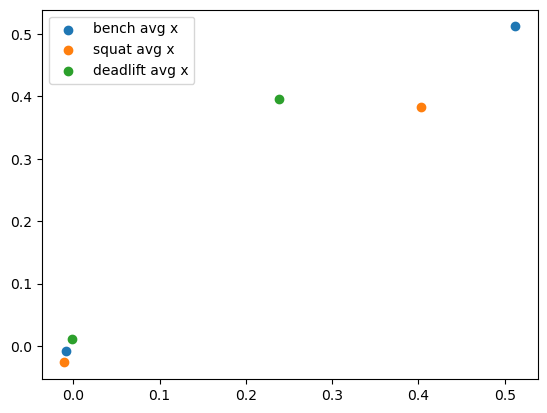

In [6]:
bench_pts = []
for e in bench: 
    squat_tensor_temp = bench[6]['gravityX'].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    bench_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

squat_pts = []
for e in squat: 
    squat_tensor_temp = e['gravityX'].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    squat_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

deadlift_pts = []
for e in deadlift: 
    squat_tensor_temp = e['gravityX'].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    deadlift_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

plt.scatter(bench_pts[:][0], bench_pts[:][1], label ='bench avg x')
plt.scatter(squat_pts[:][0], squat_pts[:][1], label ='squat avg x')
plt.scatter(deadlift_pts[:][0], deadlift_pts[:][1], label ='deadlift avg x')

plt.legend()

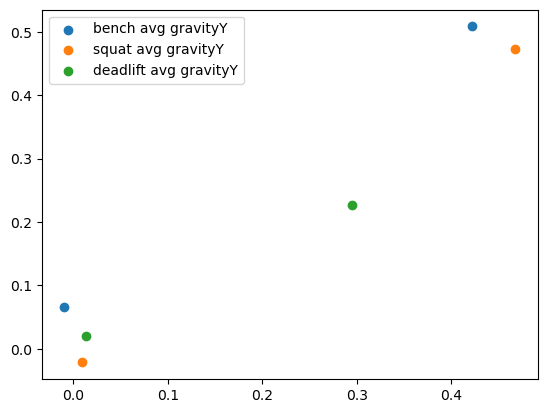

In [7]:
bench_pts = []
label = 'gravityY'
for e in bench: 
    squat_tensor_temp = e[label].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    bench_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

squat_pts = []
for e in squat: 
    squat_tensor_temp = e[label].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    squat_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

deadlift_pts = []
for e in deadlift: 
    squat_tensor_temp = e[label].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    deadlift_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

plt.scatter(bench_pts[:][0], bench_pts[:][1], label =f'bench avg {label}')
plt.scatter(squat_pts[:][0], squat_pts[:][1], label =f'squat avg {label}')
plt.scatter(deadlift_pts[:][0], deadlift_pts[:][1], label =f'deadlift avg {label}')

plt.legend()

(26, 23, 13)

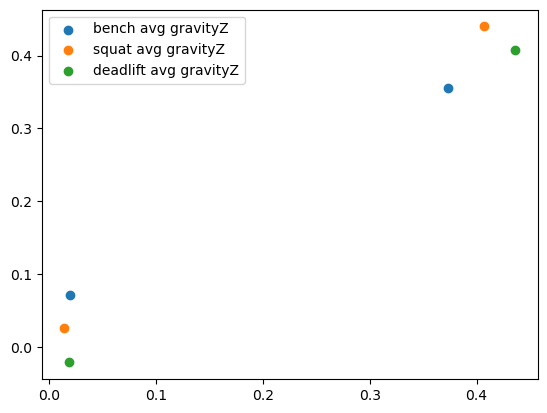

In [8]:
bench_pts = []
label = 'gravityZ'
for e in bench: 
    squat_tensor_temp = e[label].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    bench_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

squat_pts = []
for e in squat: 
    squat_tensor_temp = e[label].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    squat_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

deadlift_pts = []
for e in deadlift: 
    squat_tensor_temp = e[label].dropna().to_numpy()
    squat_tensor_temp = get_mean_std_tensor(squat_tensor_temp, interval, normalize=True)
    deadlift_pts.append((np.average(squat_tensor_temp[:, 0]), np.average(squat_tensor_temp[:, 1])))

plt.scatter(bench_pts[:][0], bench_pts[:][1], label =f'bench avg {label}')
plt.scatter(squat_pts[:][0], squat_pts[:][1], label =f'squat avg {label}')
plt.scatter(deadlift_pts[:][0], deadlift_pts[:][1], label =f'deadlift avg {label}')

plt.legend()
len(bench_pts), len(squat_pts), len(deadlift_pts), 

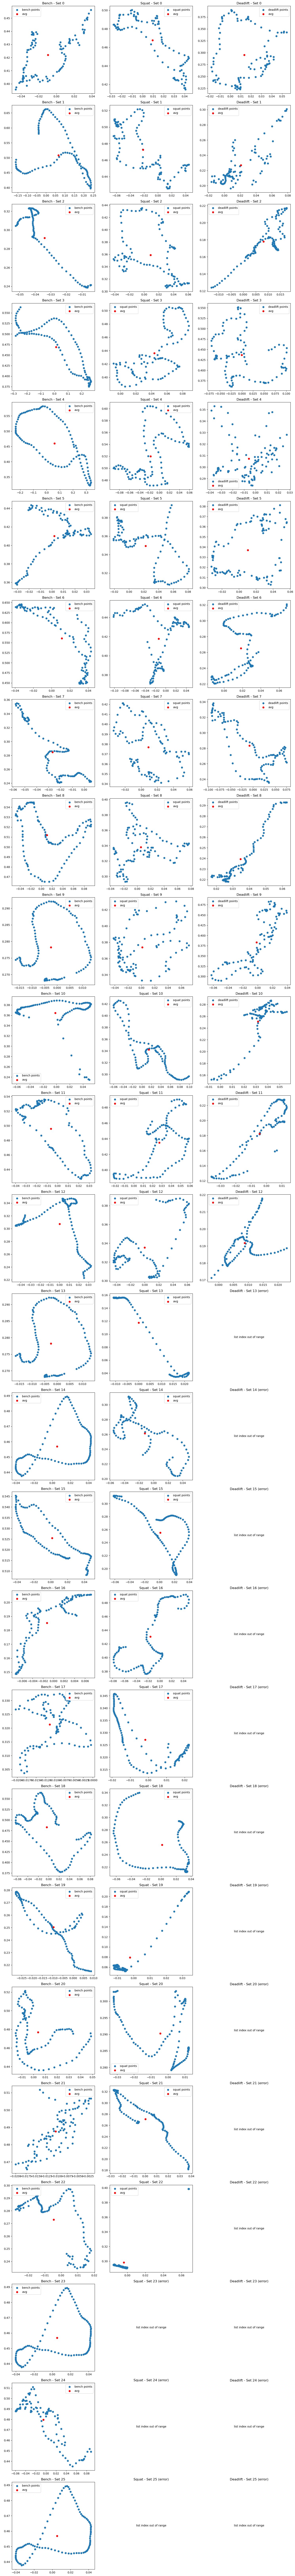

In [9]:
import matplotlib.pyplot as plt
import numpy as np

exercises = {'bench': bench, 'squat': squat, 'deadlift': deadlift}
num_sets = len(bench)  

fig, axs = plt.subplots(num_sets, 3, figsize=(15, 5 * num_sets))

for i in range(num_sets):
    for j, (exercise_name, exercise_data) in enumerate(exercises.items()):
        ax = axs[i, j] if num_sets > 1 else axs[j]  # handle 1-row case

        # Extract and process gravityX data
        try:
            gravityX = exercise_data[i]['gravityY'].dropna().to_numpy()
            tensor = get_mean_std_tensor(gravityX, interval, normalize=True)

            ax.scatter(tensor[:, 0], tensor[:, 1], label=f'{exercise_name} points')
            ax.scatter(np.mean(tensor[:, 0]), np.mean(tensor[:, 1]), color='red', label='avg')
            ax.set_title(f'{exercise_name.capitalize()} - Set {i}')
            ax.legend()
        except Exception as e:
            ax.set_title(f'{exercise_name.capitalize()} - Set {i} (error)')
            ax.text(0.5, 0.5, str(e), ha='center', va='center')
            ax.axis('off')

plt.tight_layout()
plt.show()


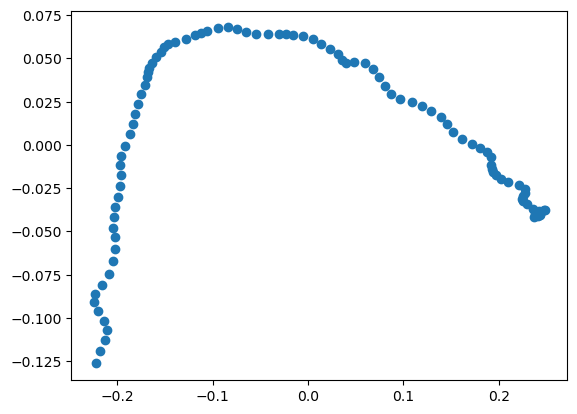

In [10]:
t = bench[0]['gravityX'].dropna().to_numpy()
t = process_signal(t, interval)
t = t.T

pca = PCA(n_components = 2)
pca.fit(t)
bench_x = np.array([pca.transform(e.reshape(1, -1)).squeeze() for e in t])
plt.scatter(bench_x[:, 0], bench_x[:, 1])

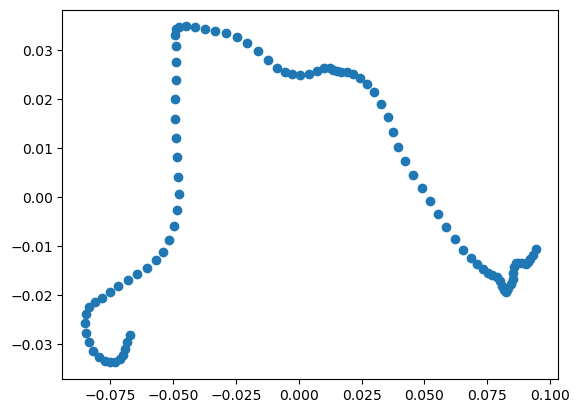

In [11]:
t = squat[0]['gravityX'].dropna().to_numpy()
t = process_signal(t, interval).T
pca = PCA(n_components = 2)
pca.fit(t)
bench_x = np.array([pca.transform(e.reshape(1, -1)).squeeze() for e in t])
plt.scatter(bench_x[:, 0], bench_x[:, 1])

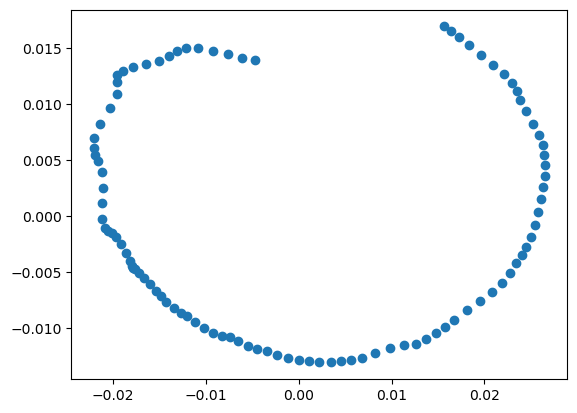

In [12]:
t = deadlift[0]['gravityX'].dropna().to_numpy()
t = process_signal(t, interval).T
pca = PCA(n_components = 2)
pca.fit(t)
bench_x = np.array([pca.transform(e.reshape(1, -1)).squeeze() for e in t])
plt.scatter(bench_x[:, 0], bench_x[:, 1])

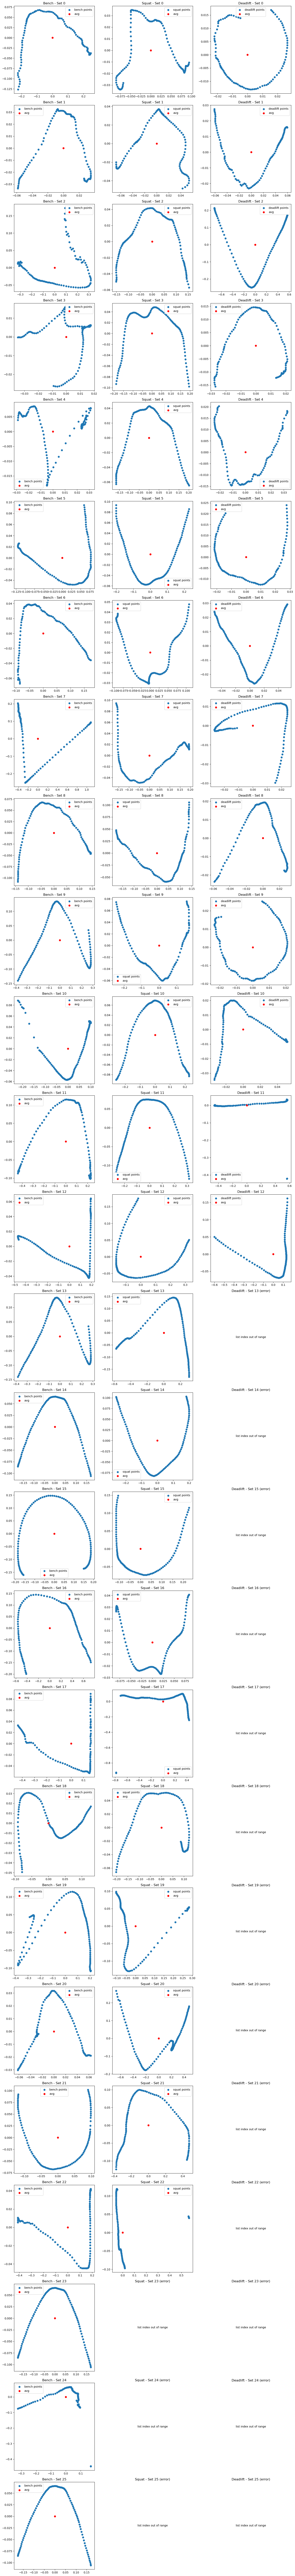

In [13]:
exercises = {'bench': bench, 'squat': squat, 'deadlift': deadlift}
num_sets = len(bench)  

fig, axs = plt.subplots(num_sets, 3, figsize=(15, 5 * num_sets))

for i in range(num_sets):
    for j, (exercise_name, exercise_data) in enumerate(exercises.items()):
        ax = axs[i, j] if num_sets > 1 else axs[j]  # handle 1-row case

        try:
            #gravityX = exercise_data[i]['gravityX'].dropna().to_numpy()
            t = exercise_data[i]['gravityX'].dropna().to_numpy()
            t = process_signal(t, interval).T
            pca = PCA(n_components = 3)
            pca.fit(t)
            tensor = np.array([pca.transform(e.reshape(1, -1)).squeeze() for e in t])

            ax.scatter(tensor[:, 0], tensor[:, 1], label=f'{exercise_name} points')
            ax.scatter(np.mean(tensor[:, 0]), np.mean(tensor[:, 1]), color='red', label='avg')
            ax.set_title(f'{exercise_name.capitalize()} - Set {i}')
            ax.legend()
        except Exception as e:
            ax.set_title(f'{exercise_name.capitalize()} - Set {i} (error)')
            ax.text(0.5, 0.5, str(e), ha='center', va='center')
            ax.axis('off')

plt.tight_layout()
plt.show()

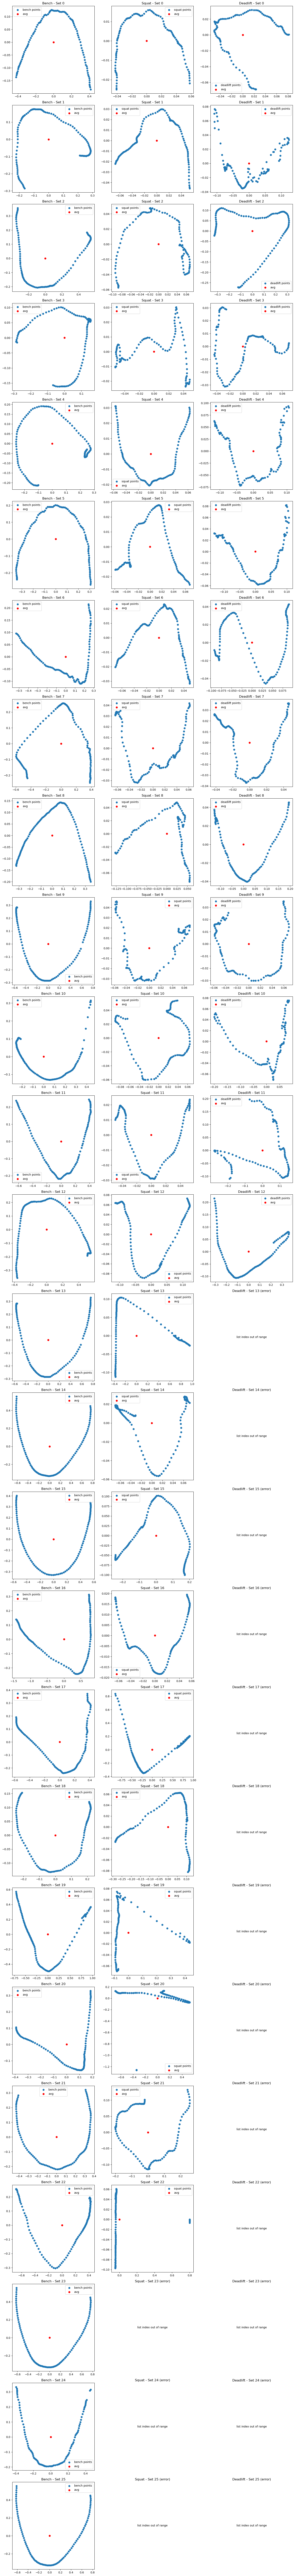

In [14]:
exercises = {'bench': bench, 'squat': squat, 'deadlift': deadlift}
num_sets = len(bench)  
label = 'gravityY'
fig, axs = plt.subplots(num_sets, 3, figsize=(15, 5 * num_sets))

for i in range(num_sets):
    for j, (exercise_name, exercise_data) in enumerate(exercises.items()):
        ax = axs[i, j] if num_sets > 1 else axs[j]  # handle 1-row case

        try:
            #gravityX = exercise_data[i]['gravityX'].dropna().to_numpy()
            t = exercise_data[i][label].dropna().to_numpy()
            t = process_signal(t, interval).T
            pca = PCA(n_components = 2)
            pca.fit(t)
            tensor = np.array([pca.transform(e.reshape(1, -1)).squeeze() for e in t])

            ax.scatter(tensor[:, 0], tensor[:, 1], label=f'{exercise_name} points')
            ax.scatter(np.mean(tensor[:, 0]), np.mean(tensor[:, 1]), color='red', label='avg')
            ax.set_title(f'{exercise_name.capitalize()} - Set {i}')
            ax.legend()
        except Exception as e:
            ax.set_title(f'{exercise_name.capitalize()} - Set {i} (error)')
            ax.text(0.5, 0.5, str(e), ha='center', va='center')
            ax.axis('off')

plt.tight_layout()
plt.show()